In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

NB - The sheet works with file with or without the group number at the end of each record; if missing, plots by group cannot be generated.

Each record of the file contains:

0 - the ID of the agent transmitting the contagion (for the initial cases, externally generated, the ID has value -1);
    
1 - its contagion progressive number, starting from 1 (for the initial cases, externally generated, this value is 0);

2 - the conventional color of the place where it turned infected, following the NetLogo color swatches (for the externally generated initial cases, this value is 0);

3 - the ID of the agent receiving the contagion;

4 - its fragility rate (1 - robust; 2 - regular; 3 - fragile; 4 - extra fragile);

5 - its contagion progressive number;

6 - the conventional color of the place where it is turning infected, following the NetLogo color swatches;

7 - the day (tick) of the contagion (for the initial cases, externally generated, this value is 0);

8 - the starting infection day, i.e., the previous value plus the *incubationPeriod* (for the externally generated initial cases, the starting infection value is 0);

9 - the day of the conclusion of the infection, i.e., the previous value plus a value between the  *minInfectionDuration* and the *maxInfectionDuration* settings; this period stops if the agent deceases, but we do not consider that possibility here;

10 - the symptomatic (1) or asymptomatic (2) status;

11 - in files produced from April 18th, 2021: the statistical group of the subject as in *contagionSeriesByGroups.ipynb*.

colors https://matplotlib.org/3.3.0/tutorials/colors/colors.html

line styles https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

We take into consideration seven groups in order of decreasing fragility if we also take into account the exposure to contagion:

- g1	extra fragile people with three components;
              people in nursing homes;
              nursing homes operators;
              healthcare operators;


- g2	teachers;

- g3    workers with medical fragility;

- g4    regular workers;

- g5    fragile people without special characteristics;

- g6    regular people, not young, not worker, and not teacher;

- g7    young people excluding special activity cases (a limited number in \emph{g1}).


In [2]:
import os
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import colors

# chosing a csv file in the current folder
filesHere=os.listdir("./")
selected=[]
for i in range(len(filesHere)):
    if filesHere[i].find('.csv')>0: selected.append(filesHere[i])
selected.sort()
for i in range(len(selected)):
    print (i, selected[i])

0 Experiment_III_05bestGA.csv
1 Experiment_III_05bestGAwithG.csv
2 Experiment_III_0bestGA.csv
3 Experiment_III_1bestGA.csv
4 Experiment_III_base.csv
5 Experiment_III_plain_0.csv
6 Experiment_III_plain_05.csv
7 Experiment_III_plain_1.csv
8 Experiment_III_wise_0.csv
9 Experiment_III_wise_05.csv
10 Experiment_III_wise_1.csv
11 Experiment_II_05bestGA.csv
12 Experiment_II_0bestGA.csv
13 Experiment_II_1bestGA.csv
14 Experiment_II_base.csv
15 Experiment_II_plain_0.csv
16 Experiment_II_plain_05.csv
17 Experiment_II_plain_1.csv
18 Experiment_II_wise_0.csv
19 Experiment_II_wise_05.csv
20 Experiment_II_wise_1.csv
21 Experiment_IV_05bestGA.csv
22 Experiment_IV_0bestGA.csv
23 Experiment_IV_1bestGA.csv
24 Experiment_IV_base.csv
25 Experiment_IV_plain_0.csv
26 Experiment_IV_plain_05.csv
27 Experiment_IV_plain_1.csv
28 Experiment_IV_wise_0.csv
29 Experiment_IV_wise_05.csv
30 Experiment_IV_wise_1.csv
31 Experiment_I_05bestGA.csv
32 Experiment_I_0bestGA.csv
33 Experiment_I_1bestGA.csv
34 Experiment_I_ba

In [3]:
num=int(input("Choose a file via its number (>=0;<="+str(len(selected)-1)+" "))
fileName=selected[num]

Choose a file via its number (>=0;<=52 0


In [4]:
rec = genfromtxt(fileName, delimiter=',').astype(np.int64)

In [5]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["xtick.labelsize"] = 'xx-large'
plt.rcParams["ytick.labelsize"] = 'xx-large'
plt.rcParams["axes.labelsize"] = 'xx-large'

In [6]:
rec.shape

(489, 11)

In [7]:
simulationDuration=rec[-1,9]

In [8]:
simulationDuration

545

### Experiment denomination

In [9]:
title="Experiment III bestGA, 50% contagion"

### All groups, symptomatic and asymptomatic

In [10]:
series=np.matrix(np.zeros([simulationDuration+1,4]))

In [11]:
# total
for i in range(rec.shape[0]):
    series[rec[i,8],0]+=1
    series[rec[i,9],1]+=1
series[0,2]=series[0,0]
series[0,3]=series[0,0]
for i in range(1,series.shape[0]):
    series[i,2]=series[i-1,2]+series[i,0]
    series[i,3]=series[i-1,3]+series[i,0]-series[i,1]

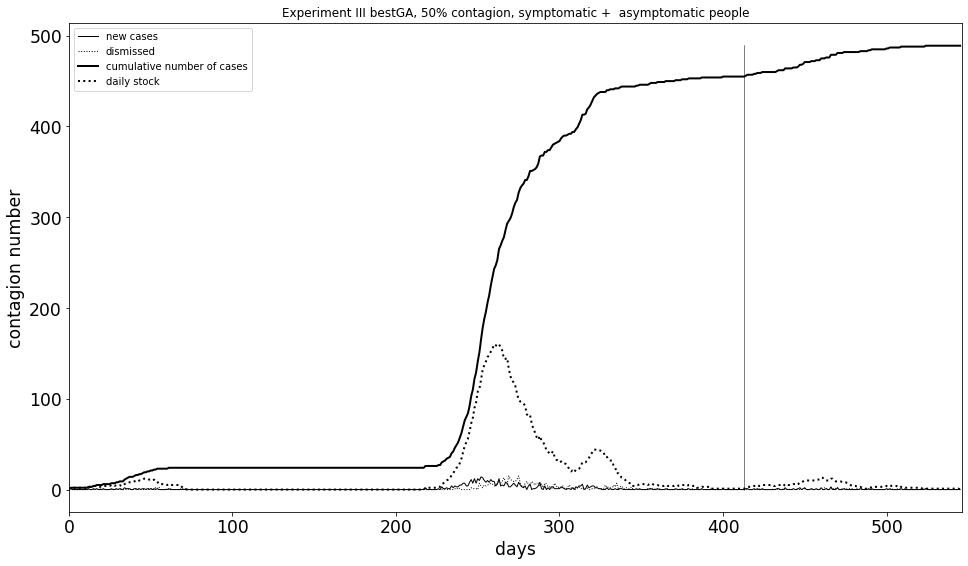

In [12]:
plt.xlim([0,series.shape[0]])
line1,=plt.plot(series[:,0],"k-",linewidth=1,label='new cases')
line2,=plt.plot(series[:,1],"k:",linewidth=1,label='dismissed')
line3,=plt.plot(series[:,2],"k-",linewidth=2,label='cumulative number of cases')
line4,=plt.plot(series[:,3],"k:",linewidth=2,label='daily stock')
plt.plot([413, 413], [0, rec.shape[0]+1],"k-",linewidth=0.5)
plt.title(title+", symptomatic +  asymptomatic people")
plt.ylabel("contagion number")
plt.xlabel("days")
plt.legend(handles=[line1,line2,line3,line4])

### All groups, symptomatic

In [13]:
series=np.matrix(np.zeros([simulationDuration+1,4]))

In [14]:
# symptomatic
for i in range(rec.shape[0]):
    if rec[i,10]==1:
        series[rec[i,8],0]+=1
        series[rec[i,9],1]+=1
series[0,2]=series[0,0]
series[0,3]=series[0,0]
for i in range(1,series.shape[0]):
    series[i,2]=series[i-1,2]+series[i,0]
    series[i,3]=series[i-1,3]+series[i,0]-series[i,1]

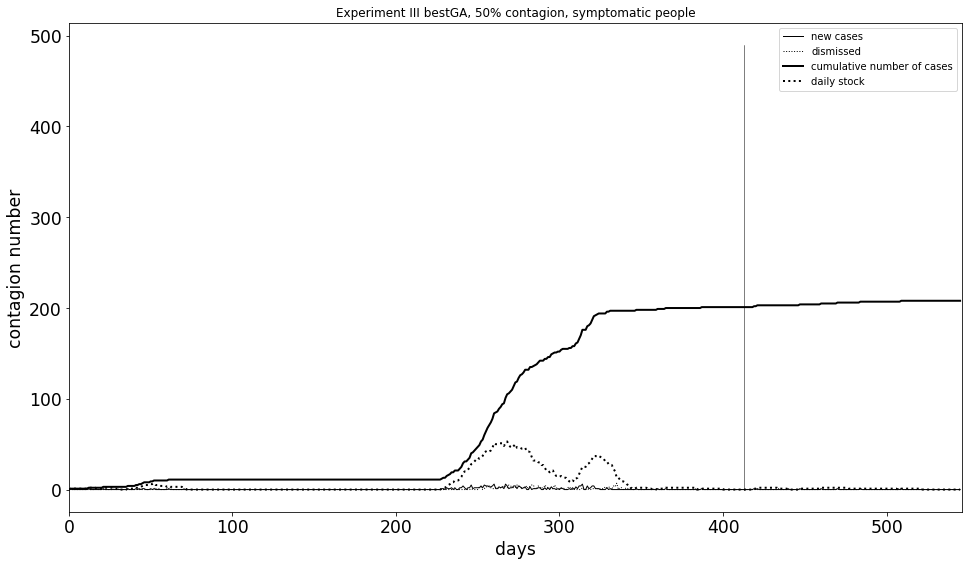

In [15]:
plt.xlim([0,series.shape[0]])
line1,=plt.plot(series[:,0],"k-",linewidth=1,label='new cases')
line2,=plt.plot(series[:,1],"k:",linewidth=1,label='dismissed')
line3,=plt.plot(series[:,2],"k-",linewidth=2,label='cumulative number of cases')
line4,=plt.plot(series[:,3],"k:",linewidth=2,label='daily stock')
plt.plot([413, 413], [0, rec.shape[0]+1],"k-",linewidth=0.5)
plt.title(title+", symptomatic people")
plt.ylabel("contagion number")
plt.xlabel("days")
plt.legend(handles=[line1,line2,line3,line4])

### Group 1, extra fragile people, symptomatic

In [16]:
series=np.matrix(np.zeros([simulationDuration+1,4]))

In [17]:
if rec.shape[1]==12:
    g=1
    groupDef="extra fragile people"
    # symptomatic
    for i in range(rec.shape[0]):
        if rec[i,10]==1 and rec[i,11]==g:
            series[rec[i,8],0]+=1
            series[rec[i,9],1]+=1
    series[0,2]=series[0,0]
    series[0,3]=series[0,0]
    for i in range(1,series.shape[0]):
        series[i,2]=series[i-1,2]+series[i,0]
        series[i,3]=series[i-1,3]+series[i,0]-series[i,1]

In [18]:
if rec.shape[1]==12:
    count=0
    for i in range(rec.shape[0]):
        if rec[i,10]==1 and rec[i,11]==g: count+=1

In [19]:
if rec.shape[1]==12:
    plt.xlim([0,series.shape[0]])
    line1,=plt.plot(series[:,0],color='orangered',linestyle="-",linewidth=1,label='new cases')
    line2,=plt.plot(series[:,1],color='orangered',linestyle=":",linewidth=1,label='dismissed')
    line3,=plt.plot(series[:,2],color='orangered',linestyle="-",linewidth=2,label='cumulative number of cases')
    line4,=plt.plot(series[:,3],color='orangered',linestyle=":",linewidth=2,label='daily stock')
    plt.plot([413, 413], [0, count+1],"k-",linewidth=0.5)
    plt.title(title+", symptomatic people, group "+str(g)+", "+groupDef)
    plt.ylabel("contagion number")
    plt.xlabel("days")
    plt.legend(handles=[line1,line2,line3,line4])

### Group 2, teachers, symptomatic

In [20]:
series=np.matrix(np.zeros([simulationDuration+1,4]))

In [21]:
if rec.shape[1]==12:
    g=2
    groupDef="teachers"
    # symptomatic
    for i in range(rec.shape[0]):
        if rec[i,10]==1 and rec[i,11]==g:
            series[rec[i,8],0]+=1
            series[rec[i,9],1]+=1
    series[0,2]=series[0,0]
    series[0,3]=series[0,0]
    for i in range(1,series.shape[0]):
        series[i,2]=series[i-1,2]+series[i,0]
        series[i,3]=series[i-1,3]+series[i,0]-series[i,1]

In [22]:
if rec.shape[1]==12:
    count=0
    for i in range(rec.shape[0]):
        if rec[i,10]==1 and rec[i,11]==g: count+=1

In [23]:
if rec.shape[1]==12:
    plt.xlim([0,series.shape[0]])
    line1,=plt.plot(series[:,0],color='lime',linestyle="-",linewidth=1,label='new cases')
    line2,=plt.plot(series[:,1],color='lime',linestyle=":",linewidth=1,label='dismissed')
    line3,=plt.plot(series[:,2],color='lime',linestyle="-",linewidth=2,label='cumulative number of cases')
    line4,=plt.plot(series[:,3],color='lime',linestyle=":",linewidth=2,label='daily stock')
    plt.plot([413, 413], [0, count+1],"k-",linewidth=0.5)
    plt.title(title+", symptomatic people, group "+str(g)+", "+groupDef)
    plt.ylabel("contagion number")
    plt.xlabel("days")
    plt.legend(handles=[line1,line2,line3,line4])

### Group 3, fragile workers, symptomatic

In [24]:
series=np.matrix(np.zeros([simulationDuration+1,4]))

In [25]:
if rec.shape[1]==12:
    g=3
    groupDef="fragile workers"
    # symptomatic
    for i in range(rec.shape[0]):
        if rec[i,10]==1 and rec[i,11]==g:
            series[rec[i,8],0]+=1
            series[rec[i,9],1]+=1
    series[0,2]=series[0,0]
    series[0,3]=series[0,0]
    for i in range(1,series.shape[0]):
        series[i,2]=series[i-1,2]+series[i,0]
        series[i,3]=series[i-1,3]+series[i,0]-series[i,1]

In [26]:
if rec.shape[1]==12:
    count=0
    for i in range(rec.shape[0]):
        if rec[i,10]==1 and rec[i,11]==g: count+=1

In [27]:
if rec.shape[1]==12:
    plt.xlim([0,series.shape[0]])
    line1,=plt.plot(series[:,0],color='maroon',linestyle="-",linewidth=1,label='new cases')
    line2,=plt.plot(series[:,1],color='maroon',linestyle=":",linewidth=1,label='dismissed')
    line3,=plt.plot(series[:,2],color='maroon',linestyle="-",linewidth=2,label='cumulative number of cases')
    line4,=plt.plot(series[:,3],color='maroon',linestyle=":",linewidth=2,label='daily stock')
    plt.plot([413, 413], [0, count+1],"k-",linewidth=0.5)
    plt.title(title+", symptomatic people, group "+str(g)+", "+groupDef)
    plt.ylabel("contagion number")
    plt.xlabel("days")
    plt.legend(handles=[line1,line2,line3,line4])